In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import HTML

# Probando cosas

import tkinter as tk
from tkinter import ttk

os.chdir('C:/Users/elias/Desktop/DataSet/SuperTiendas')

# Lee el archivo Excel
df_DataSet = pd.read_excel("Supertiendas-RuizboneElias.xlsx")

Proyecto: Análisis de las ventas minoristas

Objetivo: Analizar datos de ventas para identificar impulsores de rendimiento, oportunidades de crecimiento y desarrollar estrategias basadas en datos para aumentar las ventas y la rentabilidad.

Preguntas clave:
¿Cuáles son las tendencias de ventas a lo largo del tiempo?
¿Cómo varían las ventas por Productos, categoría, clientes, servicios y region geografica?
¿Qué productos tienen un rendimiento inferior y por qué?
¿Qué estrategias viables se pueden desarrollar para impulsar las ventas y las ganancias?

In [2]:
# Cambiando los nombres de las columnas
nuevos_nombres = {
    'Row ID': 'ID',
    'Order ID': 'ID_Pedido',
    'Order Date': 'Fecha_Pedido',
    'Ship Date': 'Fecha_Envio',
    'Ship Mode': 'Modo_Envio',
    'Customer ID': 'ID_Cliente',
    'Customer Name': 'Nombre_C',
    'Segment': 'Segmento_C',
    'Country': 'Pais_C',
    'City': 'Ciudad_C',
    'State': 'Estado_C',
    'Postal Code': 'Codigo_Postal',
    'Region': 'Region_C',
    'Product ID': 'ID_Producto',
    'Category': 'Categoria',
    'Sub-Category': 'SubCategoria',
    'Product Name': 'Producto',
    'Sales': 'Ventas',
    'Quantity': 'Cantidad_Vendida',
    'Discount': 'Descuento',
    'Profit': 'Ganancias',
  
}

df_DataSet.rename(columns=nuevos_nombres,inplace=True)
df_DataSet

,ID,ID_Pedido,Fecha_Pedido,Fecha_Envio,Modo_Envio,ID_Cliente,Nombre_C,Segmento_C,Pais_C,Ciudad_C,...,Codigo_Postal,Region_C,ID_Producto,Categoria,SubCategoria,Producto,Ventas,Cantidad_Vendida,Descuento,Ganancias
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
noDuplicados=df_DataSet.duplicated().sum()

if noDuplicados == 0:
    display(HTML(f"<h4>  <b style='color:Blue;font-size:16px;'>Resultado: </b>No Hay Valores Duplicados.</h4>")) 
else: 
    display(HTML(f"<h4>  <b style='color:Blue;font-size:16px;'>Resultado: </b>Hay {noDuplicados} Valores Duplicados.</h4>"))

ValoresNaN=df_DataSet.isna().sum().sum()

if ValoresNaN == 0:
    display(HTML(f"<h4>  <b style='color:Blue;font-size:16px;'>Resultado: </b>No Hay Valores NaN.</h4>"))
else:
    display(HTML(f"<h4>  <b style='color:Blue;font-size:16px;'>Resultado: </b>Hay {ValoresNaN} Valores NaN.</h4>"))

In [4]:
df_DataSet['Año'] = df_DataSet['Fecha_Pedido'].dt.year
df_DataSet['Mes'] = df_DataSet['Fecha_Pedido'].dt.month
df_VentasAños = df_DataSet.groupby('Año')['Ventas'].sum().reset_index()
df_VentasAños['Ventas'] = df_VentasAños['Ventas'].round(2)
df_VentasAños
df_DataSet

,ID,ID_Pedido,Fecha_Pedido,Fecha_Envio,Modo_Envio,ID_Cliente,Nombre_C,Segmento_C,Pais_C,Ciudad_C,...,ID_Producto,Categoria,SubCategoria,Producto,Ventas,Cantidad_Vendida,Descuento,Ganancias,Año,Mes
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,1
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2


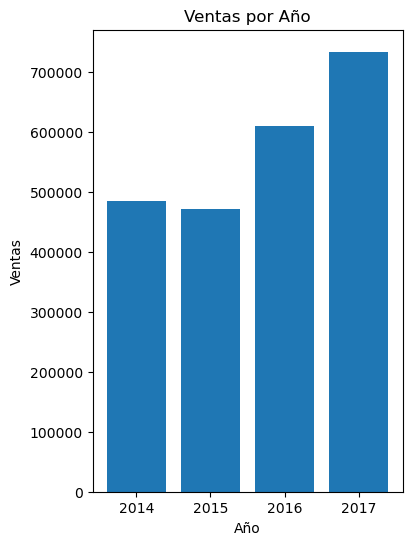

,Año,Ventas
0,2014,484247.50
1,2015,470532.51
2,2016,609205.60
3,2017,733215.26


In [19]:
# Corregir el .0 en el año


plt.figure(figsize=(4,6))  


plt.bar(df_VentasAños['Año'].astype(int), df_VentasAños['Ventas'])
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Ventas por Año')
plt.xticks(rotation=0)  
plt.show()
df_VentasAños

Hubo una tendencia de crecimiento o descrecimiento en las ventas a lo largo de estos año?

en este grafico podemos ver como aumentaron las ventas progresivamente, lo que sugiere un crecimiento en el negocio.


In [6]:
df_GananciaSegmento = df_DataSet.groupby('Segmento_C')['Ganancias'].sum().round(2)
df_GananciaSegmento

Segmento_C
Consumer       134119.21
Corporate       91979.13
Home Office     60298.68
Name: Ganancias, dtype: float64

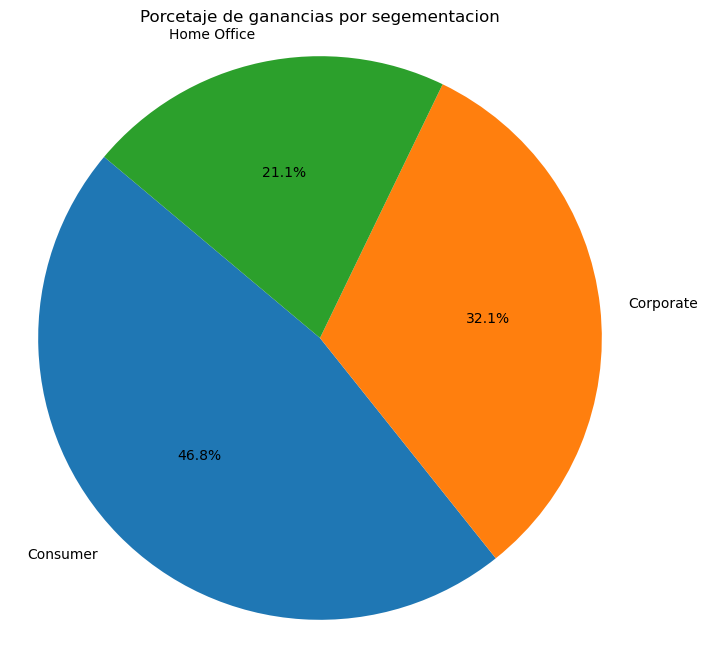

In [7]:
plt.figure(figsize=(8, 8))
plt.pie(df_GananciaSegmento, labels=df_GananciaSegmento.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcetaje de ganancias por segementacion')

plt.axis('equal')  
plt.show()






Cuál es la segmentación con la mayor participación en las ganancias? 

Consumer es la segmentación con la mayor parte de las ganancias, representando el 46.8% del total. nos sugiere que esta categoría de clientes es la más rentable para el negocio.

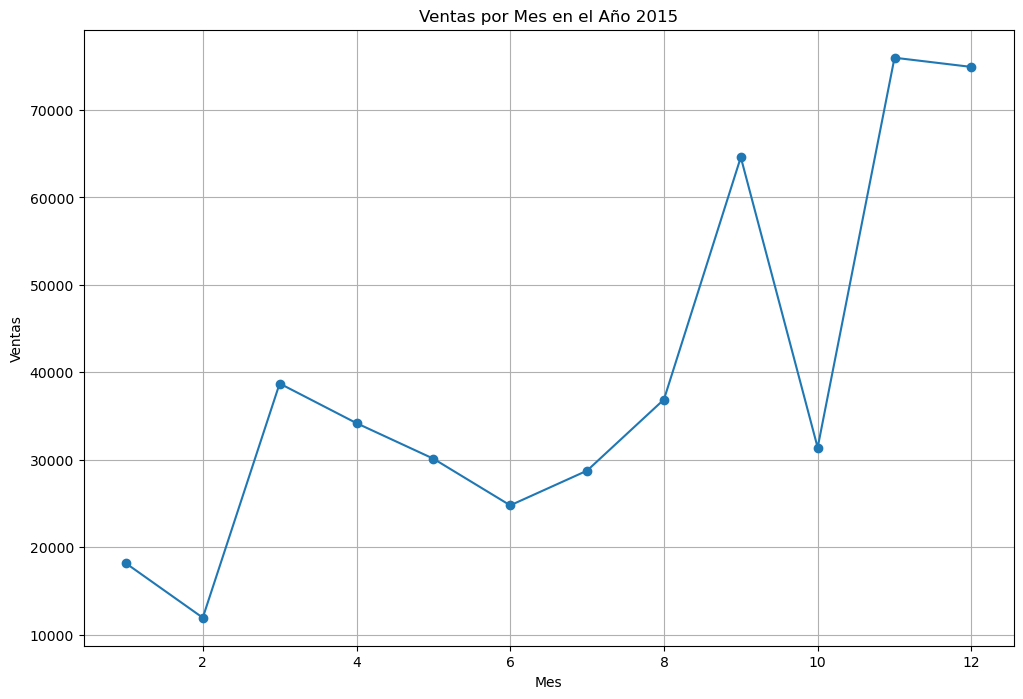

In [20]:
# Tirando codigo
# se va abrir una aplicacion en la barra de tareas donde se debe seleccionar el año para que se genere el grafico
def grafico():
    Año = combo_años.get()
    
    df_Filtrado = df_DataSet[df_DataSet['Año'] == int(Año)]
    

    df_Ventasmes = df_Filtrado.groupby('Mes')['Ventas'].sum()
    
   
    plt.figure(figsize=(12,8))
    plt.plot(df_Ventasmes.index, df_Ventasmes.values, marker='o', linestyle='-')
    plt.xlabel('Mes')
    plt.ylabel('Ventas')
    plt.title(f'Ventas por Mes en el Año {Año}')
    plt.grid(True)
    plt.show()

    ventana.destroy()

ventana = tk.Tk()
ventana.title("Seleccionar Año para generer el grafico")

años = list(df_DataSet['Año'].unique())


combo_años = ttk.Combobox(ventana, values=años)
combo_años.set("Seleccione un año")
combo_años.pack(pady=10)


boton_generar = tk.Button(ventana, text="Generar Gráfico", command=grafico)
boton_generar.pack()


ventana.mainloop()


En qué mes se producen las ventas más altas o más bajas? 
podemos observar los meses mas altos y mas bajos del año 2015 en este caso. puede ser útil para planificar estrategias de marketing.

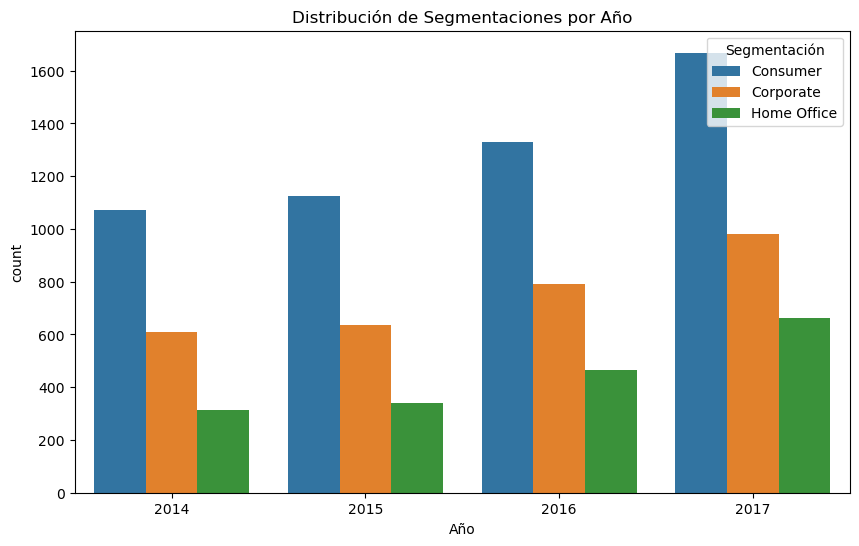

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_DataSet, x='Año', hue='Segmento_C')
plt.xlabel('Año')

plt.title('Distribución de Segmentaciones por Año')
plt.legend(title='Segmentación', loc='upper right')


plt.show()

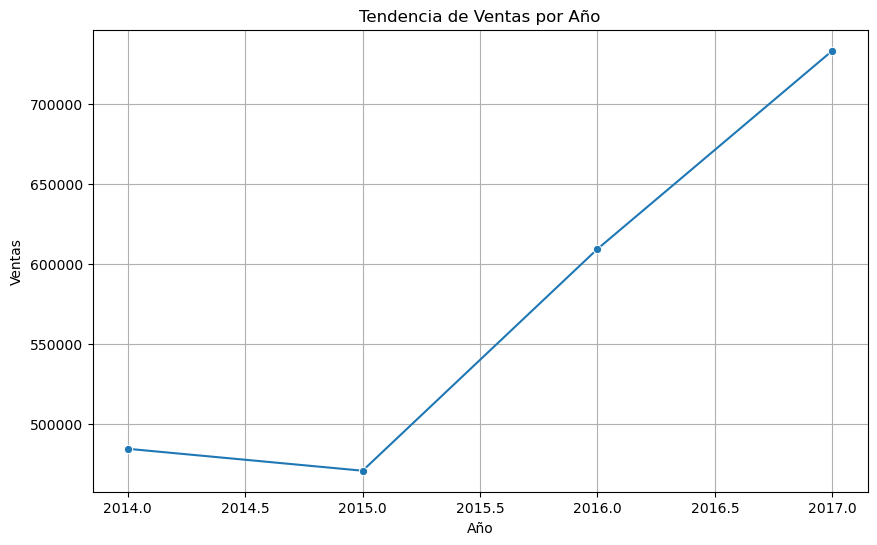

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_VentasAños, x='Año', y='Ventas', marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Tendencia de Ventas por Año')
plt.grid(True)
plt.show()

Cómo ha evolucionado el patrón de ventas a lo largo de los años? 
podemos observar que las ventas han aumentado en general sacando el 2014 que tuvo una disminucion minima, pero se podria decir que hay una tendencia alcista y esto nos indica un crecimiento constante del negocio



<Figure size 1000x600 with 0 Axes>

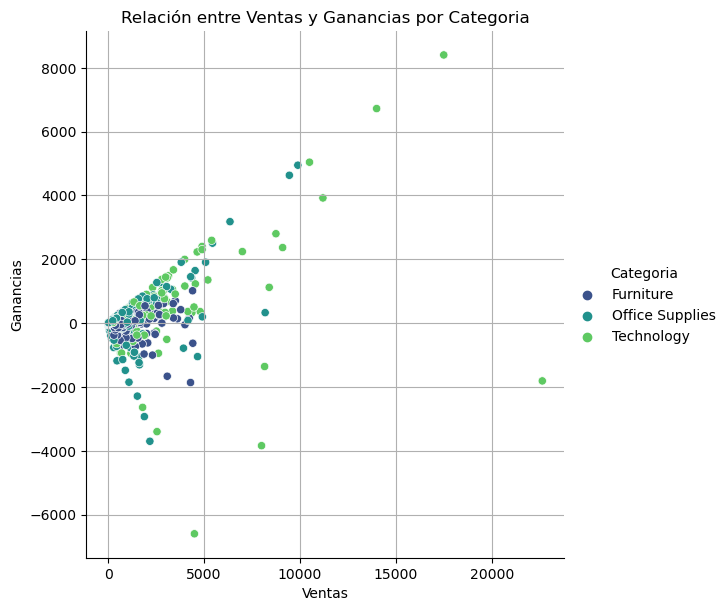

In [18]:
plt.figure(figsize=(10, 6))
sns.relplot(data=df_DataSet, x='Ventas', y='Ganancias', hue='Categoria', palette='viridis', height=6)
plt.xlabel('Ventas')
plt.ylabel('Ganancias')
plt.title('Relación entre Ventas y Ganancias por Categoria')
plt.grid(True)
plt.show()